SALES ANALYSIS

In [93]:
#Import Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
dataframes = pd.read_excel("/content/Sales_Data.xlsx")

In [96]:
state_region_mapping = pd.read_excel('/content/Sales_Data.xlsx', sheet_name='State_Region Mapping')
sales_data = pd.read_excel('/content/Sales_Data.xlsx', sheet_name='Sales')
revenue_data = pd.read_excel("/content/Sales_Data.xlsx",sheet_name="Revenue")



In [97]:
# Merge state region mapping
sales_data = sales_data.merge(state_region_mapping, on='State Id')
revenue_data = revenue_data.merge(state_region_mapping, on ="State Id")

In [98]:
sales_data

,Date,State Id,Region_x,Type,Sales,Queue,Region_y,State
0,2019-01-01,1,Central,Residential,20.0,Store,Central,Jharkhand
1,2019-01-02,1,Central,Residential,342.0,Store,Central,Jharkhand
2,2019-01-03,1,Central,Residential,187.0,Store,Central,Jharkhand
3,2019-01-04,1,Central,Residential,215.0,Store,Central,Jharkhand
4,2019-01-05,1,Central,Residential,46.0,Store,Central,Jharkhand
...,...,...,...,...,...,...,...,...
30379,2021-06-14,12,South,Business,365.0,Online,South,TamilNadu
30380,2021-06-15,12,South,Business,311.0,Online,South,TamilNadu
30381,2021-06-16,12,South,Business,266.0,Online,South,TamilNadu
30382,2021-06-17,12,South,Business,185.0,Online,South,TamilNadu


In [99]:
sales_data.drop(columns = ["Region_y"])

,Date,State Id,Region_x,Type,Sales,Queue,State
0,2019-01-01,1,Central,Residential,20.0,Store,Jharkhand
1,2019-01-02,1,Central,Residential,342.0,Store,Jharkhand
2,2019-01-03,1,Central,Residential,187.0,Store,Jharkhand
3,2019-01-04,1,Central,Residential,215.0,Store,Jharkhand
4,2019-01-05,1,Central,Residential,46.0,Store,Jharkhand
...,...,...,...,...,...,...,...
30379,2021-06-14,12,South,Business,365.0,Online,TamilNadu
30380,2021-06-15,12,South,Business,311.0,Online,TamilNadu
30381,2021-06-16,12,South,Business,266.0,Online,TamilNadu
30382,2021-06-17,12,South,Business,185.0,Online,TamilNadu


In [100]:
queue_performance_sales = sales_data.groupby('Queue')[['Region_x','Sales']].sum().reset_index()

In [101]:
queue_performance_sales

,Queue,Region_x,Sales
0,Online,CentralCentralCentralCentralCentralCentralCent...,4692282.0
1,Store,CentralCentralCentralCentralCentralCentralCent...,1276527.0


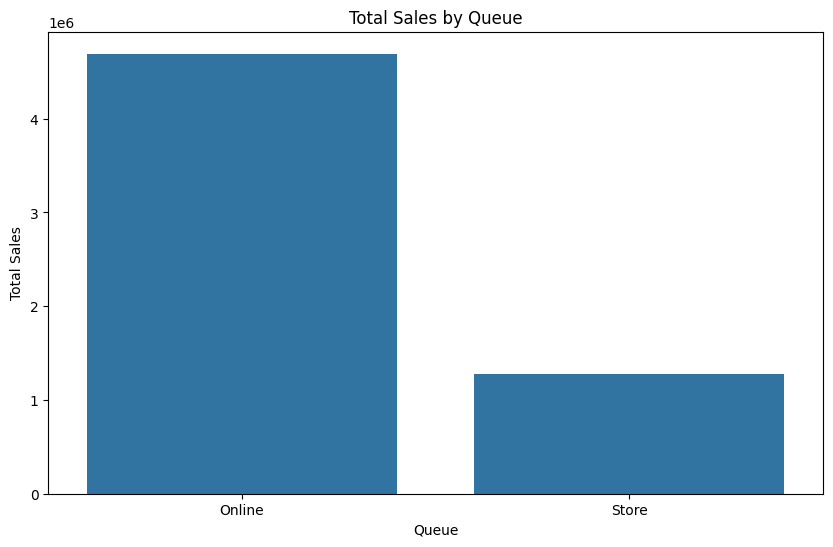

In [102]:
#Plotting the performance of queue by Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Queue', y='Sales', data=queue_performance_sales)
plt.title('Total Sales by Queue')
plt.xlabel('Queue')
plt.ylabel('Total Sales')
plt.show()



Online queue is generating more sales than offline stores

Online Total sales = INR 4692282


Offline Total sales = INR 1276527


In [103]:
revenue_data

,Date,State Id,Region_x,Type,Revenue,Queue,Region_y,State
0,2019-01-01,1,Central,Residential,10056.3200,Store,Central,Jharkhand
1,2019-01-02,1,Central,Residential,5263.0184,Store,Central,Jharkhand
2,2019-01-03,1,Central,Residential,216.0170,Store,Central,Jharkhand
3,2019-01-04,1,Central,Residential,0.0000,Store,Central,Jharkhand
4,2019-01-05,1,Central,Residential,23037.1120,Store,Central,Jharkhand
...,...,...,...,...,...,...,...,...
30379,2021-06-14,12,South,Business,30875.0192,Online,South,TamilNadu
30380,2021-06-15,12,South,Business,31228.6800,Online,South,TamilNadu
30381,2021-06-16,12,South,Business,46427.4250,Online,South,TamilNadu
30382,2021-06-17,12,South,Business,4910.5033,Online,South,TamilNadu


In [104]:
queue_performance_revenue = revenue_data.groupby('Queue')[['Region_x','Revenue']].sum().reset_index()

In [105]:
queue_performance_revenue

,Queue,Region_x,Revenue
0,Online,CentralCentralCentralCentralCentralCentralCent...,6.581032e+08
1,Store,CentralCentralCentralCentralCentralCentralCent...,9.434604e+07


In [106]:
#Plotting the performance of queue by Sales

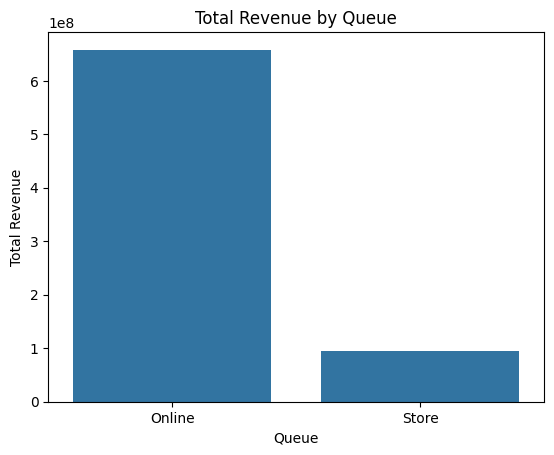

In [107]:
sns.barplot(x='Queue', y='Revenue', data=queue_performance_revenue)
plt.title('Total Revenue by Queue')
plt.xlabel('Queue')
plt.ylabel('Total Revenue')
plt.show()


Online queue is generating more revenue than offline stores

In [108]:
#State wise Sales

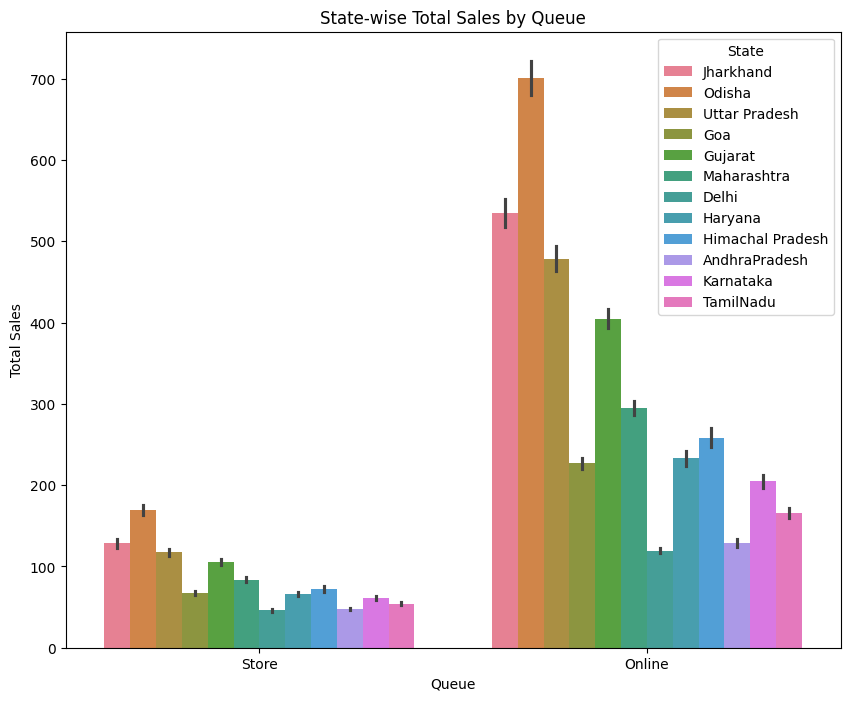

In [109]:
plt.figure(figsize=(10,8 ))
sns.barplot(x='Queue', y='Sales', hue='State', data=sales_data)
plt.title('State-wise Total Sales by Queue')
plt.xlabel('Queue')
plt.ylabel('Total Sales')
plt.legend(title='State')
plt.show()



Odisha is the top performer for both online and offline store sales. It is followed by Jharkhand and Uttarpradesh.
All the 3 states belong to central region.

In [110]:
revenue_data.columns

Index(['Date', 'State Id', 'Region_x', 'Type', 'Revenue', 'Queue', 'Region_y',
       'State'],
      dtype='object')

In [111]:
#Total Revenue: Residential vs Business

In [112]:
# Filter data for Residential and Business types
residential_data = revenue_data[revenue_data['Type'] == 'Residential']
business_data = revenue_data[revenue_data['Type'] == 'Business']

In [113]:
# Calculate average revenue per sale for Residential and Business
avg_revenue_residential = residential_data.groupby('State')['Revenue'].mean().reset_index()
avg_revenue_business = business_data.groupby('State')['Revenue'].mean().reset_index()

In [114]:
# Find the states with the highest average revenue per Residential and Business sale
highest_avg_rev_residential = avg_revenue_residential.nlargest(1, 'Revenue')
highest_avg_rev_business = avg_revenue_business.nlargest(1, 'Revenue')

In [115]:
# Convert Date to datetime and set as index for time series analysis
revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
revenue_data.set_index('Date', inplace=True)

In [116]:

# Group by State, Type and resample by quarter to calculate mean revenue
quarterly_revenue = revenue_data.groupby(['State', 'Type']).resample('Q')['Revenue'].mean().reset_index()

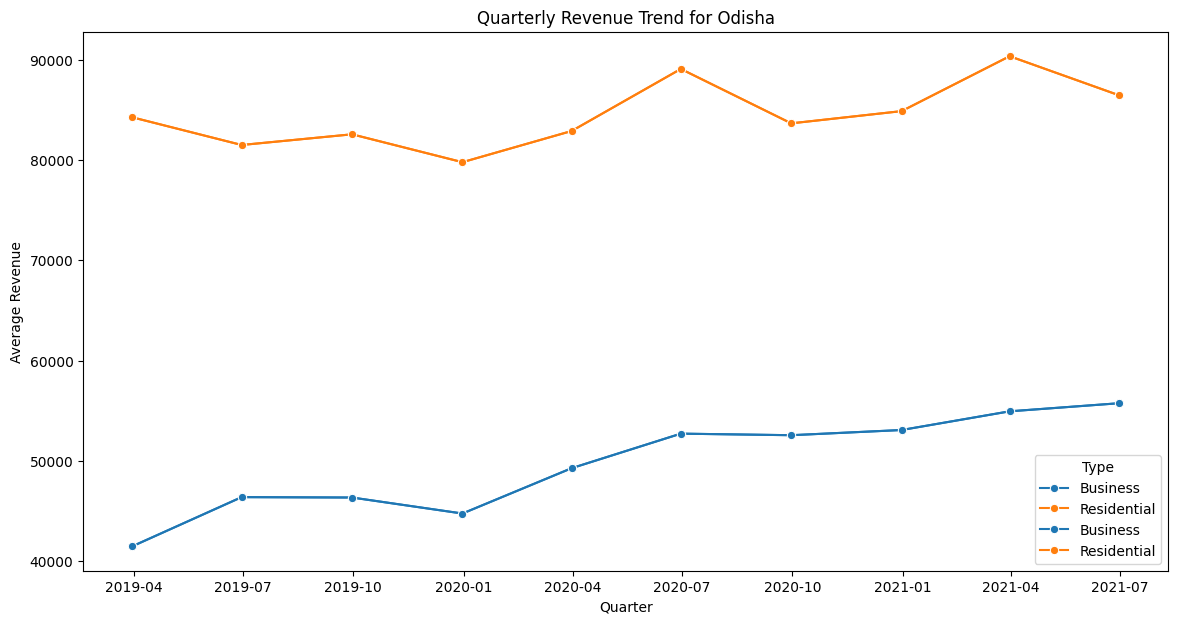

In [117]:
# Plotting the quarterly trend for the states with the highest average revenue
plt.figure(figsize=(14, 7))
for state in [highest_avg_rev_residential['State'].iloc[0], highest_avg_rev_business['State'].iloc[0]]:
    subset = quarterly_revenue[(quarterly_revenue['State'] == state) & (quarterly_revenue['Type'].isin(['Residential', 'Business']))]
    sns.lineplot(data=subset, x='Date', y='Revenue', hue='Type', marker='o')
    plt.title('Quarterly Revenue Trend for ' + state)
    plt.xlabel('Quarter')
    plt.ylabel('Average Revenue')
    plt.legend(title='Type')
plt.show()

**Odisha** has the highest average revenue per residential and business sale.The general trend for average sale is on the increasing side

In [118]:
#Sales vs States

In [119]:
# Convert Date to datetime and set as index for time series analysis if not already done
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)


In [120]:
# Group by State and resample by month to calculate sum of sales
monthly_sales = sales_data.groupby('State').resample('M')['Sales'].sum().reset_index()

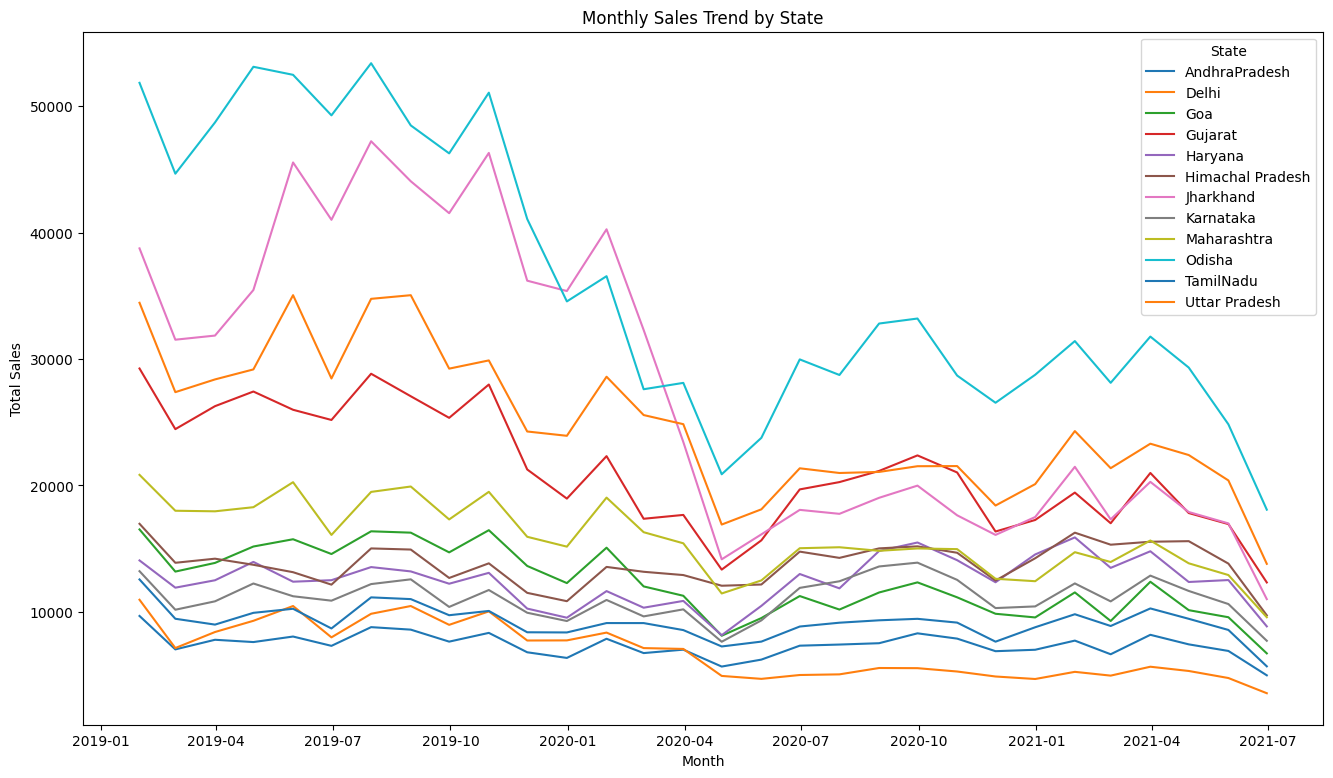

Monthly sales trends for each state are displayed.


In [121]:
# Plotting the monthly sales trend for each state
plt.figure(figsize=(16, 9))
for state in monthly_sales['State'].unique():
    state_data = monthly_sales[monthly_sales['State'] == state]
    plt.plot(state_data['Date'], state_data['Sales'], label=state)

plt.title('Monthly Sales Trend by State')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='State')
plt.show()

print('Monthly sales trends for each state are displayed.')

While considering monthly wise sales trend we can see that the trend is going downwards for all states.

In [ ]:
#Covid vs Sales

In [123]:
# Define the COVID-19 pandemic start date as March 2020
pandemic_start = "2020-03-01"


In [124]:
# Split the data into before and after COVID-19
before_covid = sales_data[sales_data.index < pandemic_start]
after_covid = sales_data[sales_data.index >= pandemic_start]

In [125]:
# Calculate the total sales before and after COVID-19
total_sales_before_covid = before_covid['Sales'].sum()
total_sales_after_covid = after_covid['Sales'].sum()


In [126]:
# Calculate the mean monthly sales before and after COVID-19
mean_sales_before_covid = before_covid['Sales'].resample('M').sum().mean()
mean_sales_after_covid = after_covid['Sales'].resample('M').sum().mean()

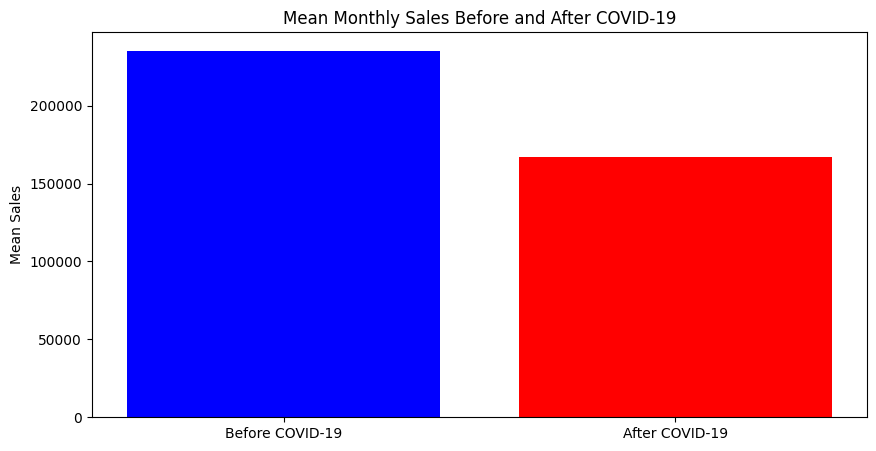

Total sales before COVID-19: 3294818.0
Total sales after COVID-19: 2673991.0
Mean monthly sales before COVID-19: 235344.14285714287
Mean monthly sales after COVID-19: 167124.4375


In [127]:
# Sales before and after COVID-19
plt.figure(figsize=(10, 5))
plt.bar(['Before COVID-19', 'After COVID-19'], [mean_sales_before_covid, mean_sales_after_covid], color=['blue', 'red'])
plt.title('Mean Monthly Sales Before and After COVID-19')
plt.ylabel('Mean Sales')
plt.show()

print(f"Total sales before COVID-19: {total_sales_before_covid}")
print(f"Total sales after COVID-19: {total_sales_after_covid}")
print(f"Mean monthly sales before COVID-19: {mean_sales_before_covid}")
print(f'Mean monthly sales after COVID-19: {mean_sales_after_covid}')

From the analysis, it is evident that both the total and mean monthly sales have decreased after the onset of COVID-19. This suggests a significant impact of the pandemic on sales performance.

# *Recommendations*
 Given the varying trends across states and the impact of
COVID-19, it is advisable for businesses to diversify their market presence and adapt their strategies according to regional market conditions and new consumer behaviors post-pandemic.


Enhanced Online Presence: Enhancing online sales channels could mitigate the impact of reduced sales of Physical stores and it can covert into a broader customer base.

Targeted Marketing: Utilize the data on states with high average revenues to tailor marketing efforts more effectively. Focus on regions and periods showing upward trends to maximize return on investment.

Risk Management: Implement robust risk management strategies to prepare for unforeseen events like pandemics, ensuring business continuity and minimizing financial impact.


